In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
# Load the datasets
daily_activity = pd.read_csv('dailyActivity_merged.csv')
sleep_data = pd.read_csv('sleepDay_merged.csv')
hourly_calories = pd.read_csv('hourlyCalories_merged.csv')
hourly_intensities = pd.read_csv('hourlyIntensities_merged.csv')
hourly_steps = pd.read_csv('hourlySteps_merged.csv')
minute_sleep = pd.read_csv('minuteSleep_merged.csv')
minute_METs = pd.read_csv('minuteMETsNarrow_merged.csv')
heartrate_seconds = pd.read_csv('heartrate_seconds_merged.csv')
weight_log = pd.read_csv('weightLogInfo_merged.csv')

In [7]:
# Find out the unique Ids in each csv files
print(daily_activity['Id'].nunique())
print(sleep_data['Id'].nunique())
print(hourly_calories['Id'].nunique())
print(hourly_intensities['Id'].nunique())
print(hourly_steps['Id'].nunique())
print(minute_sleep['Id'].nunique())
print(minute_METs['Id'].nunique())
print(heartrate_seconds['Id'].nunique())
print(weight_log['Id'].nunique())

33
24
33
33
33
24
33
14
8


In [8]:
# Load the csv files into dataframes
dataframes = {
    "Daily Activity": daily_activity,
    "Heart Rate (Seconds)": heartrate_seconds,
    "Hourly Calories": hourly_calories,
    "Hourly Intensities": hourly_intensities,
    "Hourly Steps": hourly_steps,
    "Minute Sleep": minute_sleep,
    "Sleep Day": sleep_data,
    "Weight Log Info": weight_log,
    "Minute METs Narrow": minute_METs
}

In [9]:
# Sum the total minutes for each intensity level
intensity_totals = {
    'Very Active': daily_activity['VeryActiveMinutes'].sum(),
    'Fairly Active': daily_activity['FairlyActiveMinutes'].sum(),
    'Lightly Active': daily_activity['LightlyActiveMinutes'].sum(),
    'Sedentary': daily_activity['SedentaryMinutes'].sum()
}

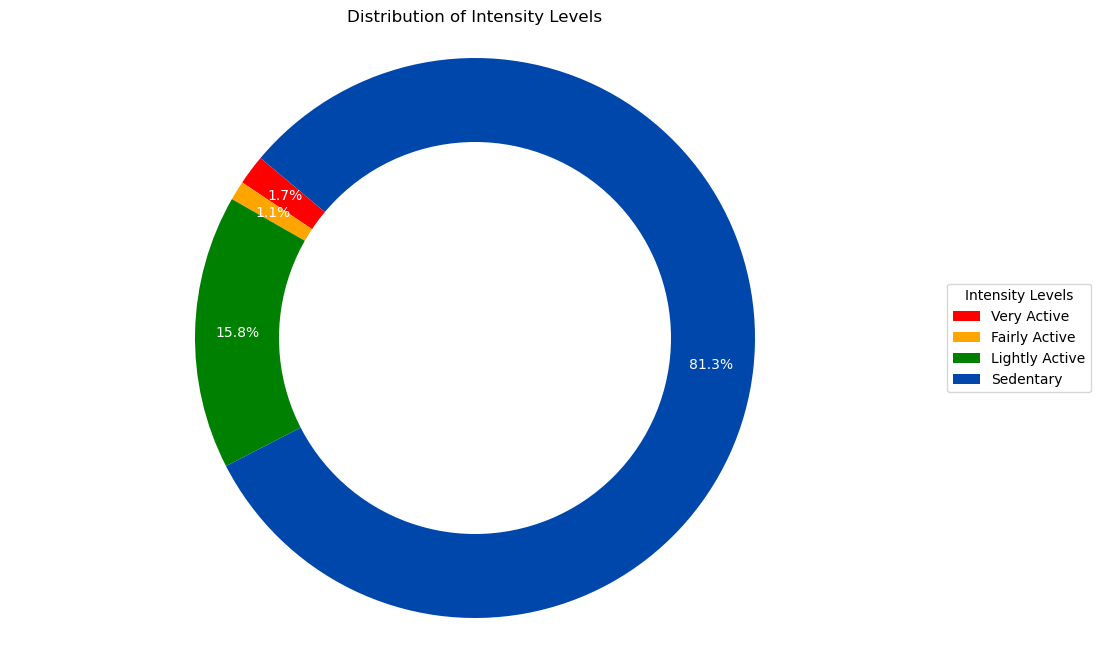

In [11]:
# Prepare data for pie chart
labels = list(intensity_totals.keys())
sizes = list(intensity_totals.values())
colors = ['red', 'orange', 'green', '#0047ab']

# Plot the pie chart
plt.figure(figsize=(12, 8))
wedges, texts, autotexts = plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors,
                                   startangle=140, pctdistance=0.85, textprops=dict(color="w"))

# Draw a circle at the center to make it look like a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add a legend outside the pie chart
plt.legend(wedges, labels, title="Intensity Levels", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

plt.title('Distribution of Intensity Levels')
plt.show()